# What is machine learning?

**Definition:** “A computer program is said to learn from experience E with respect to some class of tasks T and performance measure P, if
its performance at tasks in T, as measured in P, improves with experience E”. [Mitchell, 1997]

**Purpose:** Designing algorithms to solve T with maximum P and minimum:

  1. time complexity (same as in any application)
  2. space complexity (same as in any application)
  3. sample complexity (new!)

## Formal definitions

### Experience (E)

Our computer program observes the environment by means of a **data set**, a set of tuples called **data points**: 

$S := \{ (x_1, y_1), \ldots, (x_m, y_m) \}$. 

Each tuple comprises an **input** observation $x_i \in X$, also called a **feature vector**, and a corresponding output observation $y_i \in Y$. 

The set $X$ is called the **feature space** and the set $Y$ a **label space**. In some contexts, $S$ is called a **sample**. 

We assume that there exists a **labeling function** $f: X \rightarrow Y$ such that $y_i = f(x_i)$, which is **unknown** to us.

We further assume that each observation in the data set to be **independent and identically distributed (i.i.d.)** samples from an unknown data distribution $D$. An i.i.d. data set is denoted as $S:=\{(x_i, y_i) \overset{i.i.d}{\sim} D\}$. 

Imagine playing backgammon. Each rolling of the dice is a sample. These are independent samples if consecutive rolls do not influence each other. The samples are identically distributed if we use the same dice throughout the game. The i.i.d. assumption is at the heart of machine learning. The same process needs to be repeated for an agent to be able to learn it, just like us humans. 

### Task (T) 

Our task is to predict the outputs $y_i$ from input observations $x_i$ as accurately as possible. In mathematical terms, we look for a **hypothesis** $h: X \rightarrow Y$ that would approximate the unknown labeling function, i.e. it will satisfy $f(x) \approx h(x), \forall x \in X$. 
   * If $Y$ is a set with discrete elements, then our task is called **classification**, because it boils down to assigning an input $x_i$ to an appropriate class. Imagine $x_i$ is a picture expressed as an array of pixel intensity values, $Y$ is then the type of the object in the foreground.
   * If $Y$ is a continuous set such as $\mathbb{R}$, then our task is called **regression**. Imagine $x_i$ is the properties of a house (size, age, coordinates), $Y$ can be its price.

### Performance Measure (P) 

We define what we mean by an **accurate prediction** via a **loss (risk) function**: $L: Y \times Y \rightarrow \mathbb{R}^+$ which maps a pair $(y,y')$ comprising a prediction $y'$ and a corresponding true label $y$ to a score inversely proportional to the quality of the prediction. Commonsense design choices for supervised learning problems are:

1. the **zero-one loss** defined as $\ell(y,y') := \mathbb{I}(y \neq y')$ for classification, and
2. the **squared error** is commonplace, defined as $\ell(y,y') := (y-y')^2$ for regression.

Here $\mathbb{I}$ is the indicator function that returns $1$ if the predicate in its argument holds (e.g. if $y$ is not equal to $1$) and $0$ otherwise. Put together, we are interested in a **learning algorithm** $A(\cdot)$ that takes a data set $S$ as input and returns a hypothesis. Let us denote this hypothesis as $h_S$, where the subscript $S$ is to highlight its dependence on the data set. Then we can express the learning process as $h_S \gets A(S)$. We expect from this algorithm to minimize the **generalization error (true risk)**, which is defined for zero-one loss as:

$L_{({D,f)}}(h) := \mathbb{P}_{x \sim D}[f(x) \neq h(x)]$.

Here $\mathbb{P}_{x \sim D}$ denotes the probability that the sample $x$ will be observed. In words, this is the probability that our hypothesis will make a different prediction than the true labeling function. We will cover probability theory in the following chapters. For now it is sufficient to read is as the true chance of encountering $x$ relying on your intuitive understanding of the notion of chance.

## The Empirical Risk Minimization (ERM) Paradigm

The goal of a learning algorithm $A$ is to find the hypothesis that minimizes the generalization error:

$h_* := \arg \min_h L_{(D,f)}(h)$.

We cannot solve this optimization problem because we do not know $D$ and $f$. We only have an idea about these unknowns via the data set $S$. Let us then use the data set to curate a quantity that approximates the generalization error:

$L_S(h) := \frac{|\{i \in [m] | h(x_i) \neq f(x_i)\}|}{m}$

where $[m] := \{1, \ldots, m\}$ and $|\cdot|$ counts the number of elements a set contains, e.g. $|\{1,2\}|=2$. The quantity $L_S(h)$ is called the **training error** or **empirical risk**. We can then find a suitable hypothesis by minimizing the empirical risk:

$h_S := \arg \min_h L_S(h)$.

This paradigm, called **Empirical Risk Minimization (ERM)**, is at the center of machine learning. Yet, it has certain weaknesses. For instance, consider the following solution:

$h_S(x): = 
    \begin{cases}
        y_i, & \text{if } \exists i \in [m]~~\text{s.t.}~~x_i = x\\
        0, & \text{otherwise}
    \end{cases}$

This solution will provide us zero $L_S$. It may look like that the problem is solved, but actually this is the moment where all problems start.

## Example: Polynomial curve fitting

We observe data like below for 50 input observations $x$ and the corresponding outputs $y$. We aim to find a function $y=f(x)$ that maps inputs to outputs.

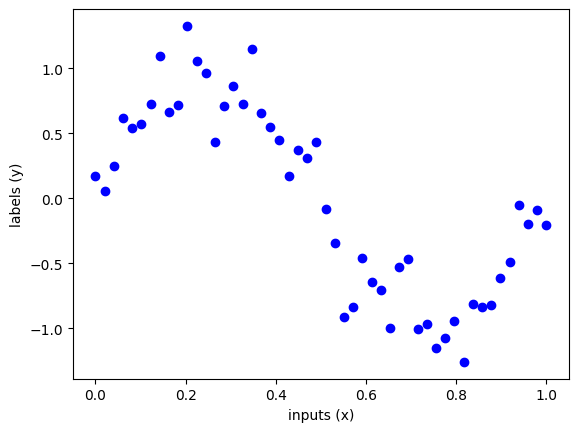

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# This is the true data generating process. 
# We do not have access to this information in a typical machine learning problem
inputs = np.linspace(0, 1, 50)              
outputs = np.sin(2*np.pi*inputs)                  
labels = outputs + np.random.randn(inputs.shape[0])*0.25

plt.plot(inputs,labels,'bo')
plt.xlabel("inputs (x)")
plt.ylabel("labels (y)")
plt.show()

Express our observations as a set of input-output tuples: $S = \{ (x_1, y_1), \cdots, (x_{50}, y_{50}) \}$. We would like to use them for two purposes: 
  * to **learn** the unknown function $f$,
  * to **evaluate** the success of the learning process (i.e. how well we expect $f$ to predict future observations)

Let us then split our data into two equal partitions randomly, one per purpose: $S = S_{train} \cup S_{test}$.

$S_{train}$ is called the **training set**. Our learning algorithm will use it to find a hypothesis that minimizes the empirical risk.

$S_{test}$ is called the **test set**. We will use it to check how well the empirical risk represents the true risk. In formal terms, we are up to approximating $L_{(D,f)}(h_S)$.

In [2]:
num_samples = inputs.shape[0]
num_train_samples = num_samples // 2 
# draw a random permutation of indices
idx = np.random.permutation(num_samples) 
inputs_train = inputs[idx[:num_train_samples]]
labels_train = labels[idx[:num_train_samples]]
inputs_test = inputs[idx[num_train_samples:]]
labels_test = labels[idx[num_train_samples:]]

By visual inspection we find out that the input and the output have a nonlinear and periodic relationship. Let us then choose a hypothesis space suitable to this approximation, for instance a polynomial of degree $M$:

$y(x) := \sum_{m=0}^M w_m x^m$.

If $M=0$, then our model learns to fit a constant: $y(x) = w_0$. 

If $M=1$, then it fits a line: $y(x) = w_0 + w_1 x$. 

If $M=2$, it fits a parabola: $y(x)=w_0 + w_1 x + w_2 x^2$, and so on.

In [3]:
class PolynomialModel:
    def __init__(self, num_polynomial_degrees = 1, regularizer=0):
        self.M = num_polynomial_degrees
        self.regularization_factor = regularizer
      
    def extract_features(self, inputs):
        input_features = np.zeros([inputs.shape[0], self.M+1])

        for m in range(self.M+1):
            input_features[:,m] = inputs ** m 

        return input_features

    def learn(self, inputs, labels):
        input_features = self.extract_features(inputs)
        XtX_inv = np.linalg.inv(input_features.T.dot(input_features)
                +self.regularization_factor*np.eye(input_features.shape[1]))
        self.weights = XtX_inv.dot(input_features.T).dot(labels)

    def predict(self, inputs):
        input_features = self.extract_features(inputs)
        predictions = input_features.dot(self.weights)
        return predictions

The **extract_features** function converts each one-dimensional observation to an $M-$ dimensional **feature vector**. This operation is called **feature extraction**. 

The **learn** function takes a set of inputs and their corresponding labels in its arguments and fits the unknown model parameters $w_0, \cdots, w_M$ to data. We will cover later how exactly it does that.

The **predict** function takes only inputs in its arguments. It predicts their corresponding labels itself, hence the name. The source code of advanced machine learning models we will see later on follows the same template.

In [4]:
model = PolynomialModel(num_polynomial_degrees=3) # Create the model instance

# Training
model.learn(inputs_train, labels_train) 

# Testing
predictions_test = model.predict(inputs_test) 
root_mean_squared_error = np.sqrt(((labels_test - predictions_test) ** 2).mean()) 

print(root_mean_squared_error)

0.2499155790611835


Let us visualize all we have. In the plot below, the training set is shown as blue circles, test set as green circles, and the predictions of our machine learning model in red circles. The black curve is the labeling function we are trying to finding out. Note that we can observe only noisy evaluations of it, just as in the real life. Data collection processes are affected by unintended factors, which we call **noise**. 

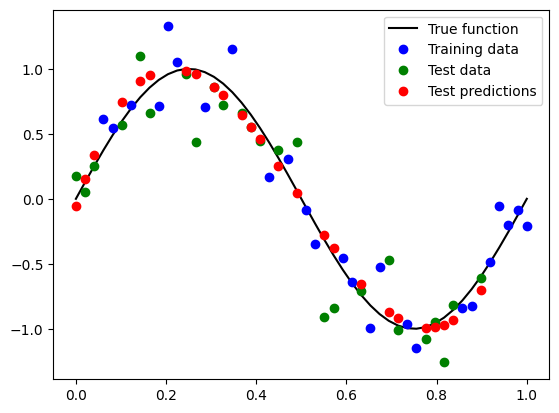

In [5]:
plt.plot(inputs,outputs,'k-', label="True function")
plt.plot(inputs_train,labels_train,'bo', label="Training data")
plt.plot(inputs_test, labels_test,'go', label="Test data")
plt.plot(inputs_test,predictions_test,'ro', label="Test predictions")
plt.legend(loc="upper right")
plt.show()

The properties of the model we have to choose before running the learning algorithm are called **hyperparameters**. For instance, the polynomial degree $M$ is a hyperparameter. Let us simply try all options from 1 to 10 and see how it affects the model behavior.

Since we have a regression problem, we follow the common sense and choose the squared error loss function. We take its square-root to bring it to the same scale as the label space:

$L_S := \sqrt{\frac{1}{m} \sum_{i \in [m]} (h(x_i) - y_i)^2}$.

This loss function is called the **Root Mean Squared Error (RMSE)**.

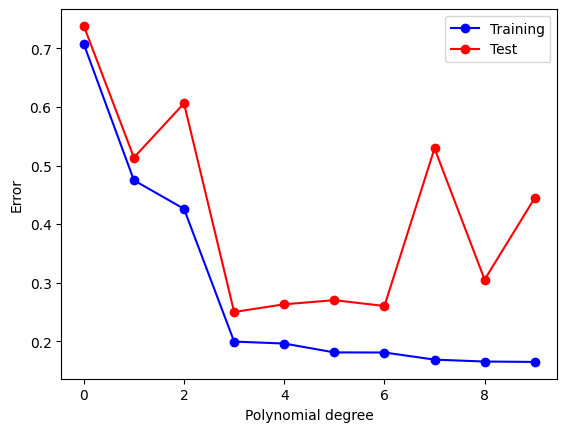

In [6]:
# The performance score
def root_mean_squared_error(labels_true, predictions):
    return np.sqrt(((labels_true - predictions) ** 2).mean())

Mmax = 10
train_errors = np.zeros(Mmax)
test_errors = np.zeros(Mmax)

for M in range(Mmax):
    model = PolynomialModel(num_polynomial_degrees=M) 
    # Create the model instance

    # Training
    model.learn(inputs_train, labels_train) # Fit parameters to data on the training split.
    predictions_train = model.predict(inputs_train)
    train_err = root_mean_squared_error(labels_train, predictions_train)

    # Testing
    predictions_test = model.predict(inputs_test) # Make predictions on the test split.
    test_err = root_mean_squared_error(labels_test, predictions_test) # Evaluate performance.

    train_errors[M] = train_err
    test_errors[M] = test_err

plt.plot(np.arange(Mmax),train_errors,"bo-", label="Training")
plt.plot(np.arange(Mmax),test_errors,"ro-", label="Test")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.show()

**Expected:** As $M$ increases, the training error $L_{S_{train}}(h_S)$ monotonically decreases.

**Surprise:** However, the test error $L_{S_{test}}(h_S)$ decreases up to $M=6$, and then sharply increases. 

What may have went wrong? Let us take a closer look into individual cases.

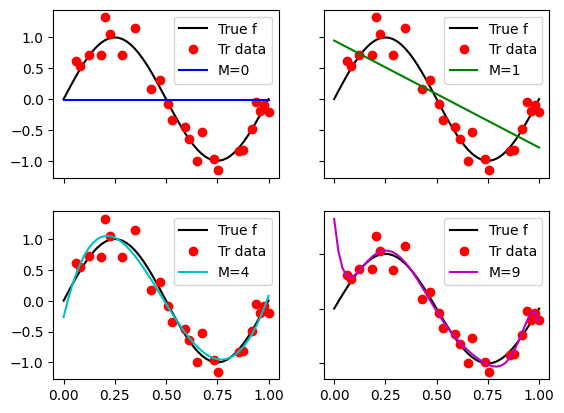

In [7]:
model0 = PolynomialModel(num_polynomial_degrees=0) 
model0.learn(inputs_train, labels_train) 
pred_0 = model0.predict(inputs)

model1 = PolynomialModel(num_polynomial_degrees=1) 
model1.learn(inputs_train, labels_train) 
pred_1 = model1.predict(inputs)

model4 = PolynomialModel(num_polynomial_degrees=4) 
model4.learn(inputs_train, labels_train) 
pred_4 = model4.predict(inputs)

model9 = PolynomialModel(num_polynomial_degrees=9) 
model9.learn(inputs_train, labels_train) 
pred_9 = model9.predict(inputs)

fig, axs = plt.subplots(2, 2)

for ax in axs.flat:
    ax.plot(inputs, outputs,'k-', label="True f")
    ax.plot(inputs_train, labels_train,'ro', label="Tr data")

axs[0, 0].plot(inputs, pred_0,'b-', label="M=0")
axs[0, 1].plot(inputs, pred_1,'g-', label="M=1")
axs[1, 0].plot(inputs, pred_4,'c-', label="M=4")
axs[1, 1].plot(inputs, pred_9,'m-', label="M=9")

for ax in axs.flat:
    ax.legend(loc="upper right")
    ax.label_outer()



The model had poor performance because it could not expess a periodic relationship with a constant $M=0$ or a line $M=1$. Poor model fit due to limited model capacity is called **underfitting**. An underfitted model performs poorly on both training and test data, i.e. it has high $L_{S_{train}}(h_S)$ and high $L_{S_{test}}(h_S)$.

What goes on for $M=9$ is interesting. A polynomial with such high degree is flexible enough to make sharp turns. The model learned to use this flexibility to fit also to the left and right-most data points, but then it missed to capture the trend and diverged from the true labeling function. It is called **overfitting** when a model fits to training data extremely well, i.e. low $L_{S_{train}}(h_S)$, but delivers poor performance on test data, i.e. high $L_{S_{test}}(h_S)$. 

**REMARK:** Designing highly-expressive models while keeping them immune to overfitting is one of the fundamental problems of machine learning.

To mitigate overfitting, we need to devise an algorithm that encourages minimum empirical risk and penalizes the increase of model capacity. Once choice could be as follows:

$h_S := \arg \min_h L_S(h) + \lambda w_m^2$.

Here the term $\lambda w_m^2$ is called a **regularizer** and $\lambda$ a **regularization coefficient**. Let us see what happens then.

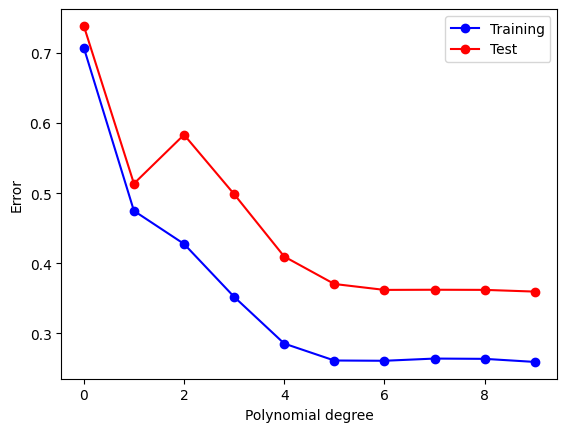

In [8]:
for M in range(Mmax):
    model = PolynomialModel(num_polynomial_degrees=M, regularizer=0.01) 
    # Create the model instance

    # Training
    model.learn(inputs_train, labels_train) # Fit parameters to data on the training split.
    predictions_train = model.predict(inputs_train)
    train_err = root_mean_squared_error(labels_train, predictions_train)

    # Testing
    predictions_test = model.predict(inputs_test) # Make predictions on the test split.
    test_err = root_mean_squared_error(labels_test, predictions_test) # Evaluate performance.

    train_errors[M] = train_err
    test_errors[M] = test_err

plt.plot(np.arange(Mmax),train_errors,"bo-", label="Training")
plt.plot(np.arange(Mmax),test_errors,"ro-", label="Test")
plt.xlabel("Polynomial degree")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.show()

As seen, having a regularizer term significantly mitigates overfitting when the model capacity, i.e. the polynomial degree, increases.